In [28]:
import json
from automata.fa.nfa import NFA
from automata.fa.dfa import DFA
from visual_automata.fa.nfa import VisualNFA
from visual_automata.fa.dfa import VisualDFA

In [29]:
dfa = {}
nfa = {}
nfa_states = []
dfa_states = []

def load_nfa():
    global nfa
    with open('input.json', 'r') as inpjson:
        nfa = json.loads(inpjson.read())
        
def out_dfa():
    global dfa
    with open('output.json', 'w') as outjson:
        outjson.write(json.dumps(dfa, indent=4))

def get_power_set(nfa_st):
    powerset = [[]]
    for i in nfa_st:
        for sub in powerset:
            powerset = powerset + [list(sub) + [i]]
    return powerset

In [30]:
load_nfa()

In [31]:
dfa['states'] = []
dfa['letters'] = nfa['letters']
dfa['transition_function'] = []


nfa_states = [states for states in nfa['states']]
print(nfa_states)
dfa_states = get_power_set(nfa_states)
print(dfa_states)
dfa['states'] = [[state for state in states] for states in dfa_states]

for states in dfa_states:
    for letter in nfa['letters']:
        q_to = []
        for state in states:
            for val in nfa['transition_function']:
                if state == val[0] and letter == val[1] and val[2] not in q_to:
                    q_to.append(val[2])
        q_states = [o for o in states]
        dfa['transition_function'].append([q_states, letter, q_to])
        print(dfa['transition_function'])

dfa['start_states'] = [state for state in nfa['start_states']]

dfa['final_states'] = []
for states in dfa['states']:
    for state in states:
        if state in nfa['final_states'] and states not in dfa['final_states']:
            dfa['final_states'].append(states)

['Q0', 'Q1', 'Q2']
[[], ['Q0'], ['Q1'], ['Q0', 'Q1'], ['Q2'], ['Q0', 'Q2'], ['Q1', 'Q2'], ['Q0', 'Q1', 'Q2']]
[[[], 'a', []]]
[[[], 'a', []], [[], 'b', []]]
[[[], 'a', []], [[], 'b', []], [['Q0'], 'a', ['Q1', 'Q2']]]
[[[], 'a', []], [[], 'b', []], [['Q0'], 'a', ['Q1', 'Q2']], [['Q0'], 'b', []]]
[[[], 'a', []], [[], 'b', []], [['Q0'], 'a', ['Q1', 'Q2']], [['Q0'], 'b', []], [['Q1'], 'a', []]]
[[[], 'a', []], [[], 'b', []], [['Q0'], 'a', ['Q1', 'Q2']], [['Q0'], 'b', []], [['Q1'], 'a', []], [['Q1'], 'b', []]]
[[[], 'a', []], [[], 'b', []], [['Q0'], 'a', ['Q1', 'Q2']], [['Q0'], 'b', []], [['Q1'], 'a', []], [['Q1'], 'b', []], [['Q0', 'Q1'], 'a', ['Q1', 'Q2']]]
[[[], 'a', []], [[], 'b', []], [['Q0'], 'a', ['Q1', 'Q2']], [['Q0'], 'b', []], [['Q1'], 'a', []], [['Q1'], 'b', []], [['Q0', 'Q1'], 'a', ['Q1', 'Q2']], [['Q0', 'Q1'], 'b', []]]
[[[], 'a', []], [[], 'b', []], [['Q0'], 'a', ['Q1', 'Q2']], [['Q0'], 'b', []], [['Q1'], 'a', []], [['Q1'], 'b', []], [['Q0', 'Q1'], 'a', ['Q1', 'Q2']], [['Q0', 

In [32]:
out_dfa()

In [33]:
transitions_ = {}
for x in nfa['transition_function']:
    if x[0] not in transitions_:
        transitions_[x[0]] = {}

    if x[1] not in transitions_[x[0]]:
        transitions_[x[0]][x[1]] = set()

    transitions_[x[0]][x[1]].add(x[2])

nfa_ = NFA(
    states=set(nfa['states']),
    input_symbols=set(nfa['letters']),
    transitions=transitions_,
    initial_state=nfa['start_states'][0],
    final_states=set(nfa['final_states'])
)

nfa_ = VisualNFA(nfa_)
print(nfa_.table)

            a   b
→Q0  {*Q1,Q2}   ∅
Q2   {*Q1,Q2}  Q2


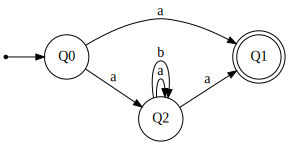

In [34]:
nfa_.show_diagram()

In [35]:
states_ = set()
for x in dfa['states']:
    if x:
        x.sort()
        x_str = '|'.join(map(str, x))
        states_.add(x_str)

final_states_ = set()
for x in dfa['final_states']:
    if x:
        x.sort()
        x_str = '|'.join(map(str, x))
        final_states_.add(x_str)

add_DeadState = None
Transitions_ = {}
for x in dfa['transition_function']:
    if x[0] or x[2]:
        x[0].sort()
        x[2].sort()
        
        if not x[0]:
            x[0] = '∅'
            add_DeadState = True
        if not x[2]:
            x[2] = '∅'
            add_DeadState = True
        
        X0 = '|'.join(map(str, x[0]))
        X2 = '|'.join(map(str, x[2]))

        if X0 not in Transitions_:
            Transitions_[X0] = {}

        Transitions_[X0][x[1]] = X2
              
if add_DeadState:
    states_.add('∅')
    Transitions_['∅'] = {}
    for i in set(dfa['letters']):
        Transitions_['∅'][i] = '∅'

        
# print(Transitions_)

# print(dfa['transition_function'], end='\n\n')
# print(states_, end='\n\n')
# print(set(dfa['letters']), end='\n\n')
# print(Transitions_, end='\n\n')
# print(dfa['start_states'][0], end='\n\n')
# print(final_states_)

dfa_ = DFA(
    states=states_,
    input_symbols=set(dfa['letters']),
    transitions=Transitions_,
    initial_state=dfa['start_states'][0],
    final_states=final_states_,
    allow_partial=True
)

dfa_ = VisualDFA(dfa_)
print(dfa_.table)

                a   b
→Q0        *Q1|Q2   ∅
*Q0|Q1     *Q1|Q2   ∅
*Q0|Q1|Q2  *Q1|Q2  Q2
Q0|Q2      *Q1|Q2  Q2
*Q1             ∅   ∅
*Q1|Q2     *Q1|Q2  Q2
Q2         *Q1|Q2  Q2
∅               ∅   ∅


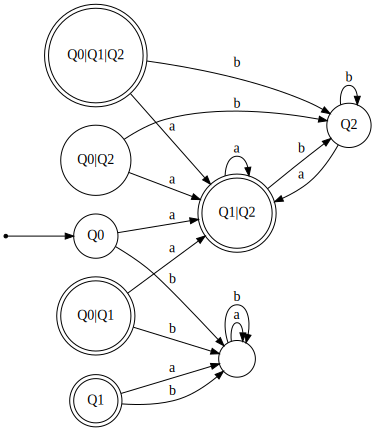

In [36]:
dfa_.show_diagram()